<a href="https://colab.research.google.com/github/Bogdusik/Weevent/blob/main/S2431695CW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CW01 Introduction to Data Science 24/25
###Edmond Cselik
###Software Development
###S2431695


## Overview of Objectives

Introduction

	•	Provide a concise overview of the dataset.
	•	Discuss challenges commonly encountered with real-world data sources.
	•	Summarise the objectives of the assessment.
	•	Outline the key questions that the report aims to address through Exploratory Data Analysis (EDA).

Data Loading and Initial Inspection

	•	Load the dataset into the environment.
	•	Present basic details about the dataset, including the total number of rows and columns.
	•	Review the initial rows of the dataset to gain insights into the data structure.
	•	Describe the steps taken during this process.

Data Cleansing and Pre-processing

	•	Identify and rectify any errors in the data, including the removal of rows as necessary and the elimination of unnamed columns.
	•	Assess relevant numeric columns by counting outliers using a threshold of four standard deviations (SD).
	•	Elaborate on the techniques used for data cleansing and pre-processing.

Univariate Analysis

	•	Analyse the dataset through basic statistics, focusing on measures of central tendency, standard deviations, and value counts.
	•	Visualise the distribution of key numeric variables using histograms.
	•	Generate a categorical variable from an existing numeric column to facilitate bar chart visualisation.
	•	Investigate the frequency distribution of the newly created categorical variable with a bar chart.
	•	Explain the methodologies used and present your findings in relation to the report’s objectives.

Bivariate Analysis

	•	Conduct an analysis of the data using pivot tables across multiple columns.
	•	Perform cross-tabulation analysis between two specific columns.
	•	Clarify the methodologies employed and summarise your findings in connection with the report’s goals.

Conclusions

	•	Recap the main findings from the analysis and discuss the insights gained from the EDA.

##Introduction

The **spotify5000.csv** dataset is an extensive list that holds various musical attributes and listener engagement metrics. Each entry in this data set provides qualitative and quantitative dimensions.

The dataset provides valuable insights for exploring a number of aspects of music, from artist profiles and genre classifications to musical qualities and listener interactions. The data provided can help the study of musical trends over time.

Datasets may come with a range of difficulties that can complicate the readability and use due to outside factors such as human error during collection, missing data or varying formats.

Datasets can be overwhelming due to their size, therefore they can require significant computing power for storage and/or analysis - furthermore, some data comes in *unstructured* formats which could require additional processing tools and resources.

Other noteable challanges are data integration, relevance, ethical concerns, context and technical limitations.

## Key Questions

What are the distribution of average ratings and number of ratings across different genres?


	•	This questions aims to identify the overall performance of each genre by examining how ratings are distributed.

Are there any notable correlations between the average ratings and the number of ratings received by different genres?


	•	Investigating the relationship between these two metrics can reveal whether genres with more ratings tend to have higher or lower average ratings.

How do outliers affect the average ratings and the analysis overall?


	•	This questions focuses on identifying specific traits or features associated with the top and bottom-rated genres.


What data cleansing and preprocessing steps are neccessary to ensure the dataset is robust for analysis?


	•	It is important to understand the importance of data quality and integrity to be able to conduct a meaningful data analysis.


How does the genre distribution change when looking at the number of albums versus the ratings received?


	By examining both the number of albums in each genre and the ratings they receive, this question seeks to uncover whether certain genres have a larger or smaller presence in the dataset and how that impacts their overall ratings.

## Initial Inspection

In [ ]:
import pandas as pd # high-performance data manipulation and analysis tools
import numpy as np # provides support for large, multi-dimensional arrays and matrices
import matplotlib.pyplot as plt # provides a collection of functions for creating static, interactive, and animated visualisations

df = pd.read_csv('Spotify5000.csv') # Loading the dataset


***Pandas*** library is used for data manipulation and analysis. It provides structures like DataFrames, which are ideal for organising, manipulating, and analysing tabular data.

***Numpy*** supports efficient numerical operations on large, multi-dimensional arrays and matrices. It offers mathematical functiopns and tools to perform operations on arrays, essential for data processing and manipulation.

***Matplotlib*** is a plotting library used for visualising data. It provides tools for creating various types of plots, including line plots, scatter plots, histograms (important with this analysis since we used it quite often), and many more. This allows us to visualise data patterns and trends.





In [ ]:
# Display initial information about dataset
print("\nBasic Information:")
print(df.info())

# Displaying rows of the dataset
print("\nFirst few rows of the dataset: ")
print(df.head()) # Displays the first 5 by default

# Clean up the 'gens' column to remove extra spaces
df['gens'] = df['gens'].str.strip()                    # Removes leading/trailing spaces
df['gens'] = df['gens'].str.replace(r'\s+', ' ', regex=True)  # Replaces multiple spaces with a single space



Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4402 entries, 0 to 4401
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4402 non-null   int64  
 1   ars_name          4402 non-null   object 
 2   rel_date          4402 non-null   object 
 3   gens              4402 non-null   object 
 4   descs             4304 non-null   object 
 5   avg_rat           4402 non-null   float64
 6   num_rat           4402 non-null   object 
 7   num_revs          4402 non-null   int64  
 8   album             4402 non-null   object 
 9   acousticness      4402 non-null   float64
 10  danceability      4402 non-null   float64
 11  energy            4402 non-null   float64
 12  instrumentalness  4402 non-null   float64
 13  liveness          4402 non-null   float64
 14  loudness          4402 non-null   float64
 15  speechiness       4402 non-null   float64
 16  tempo             4402

The output data above provides a summary of the data stored in this dataset. We can see that there are 4,402 rows and 20 columns.

The first few rows reveals attributes such as **Artist Name**, **Release Date**, **Genres**, **Description**, **Average Rating**, **Number of Ratings**, **Number of Reviews** and **Number of Ratings**

Most importantly, we had to import the pandas library, which is used to handle and analyse data in Python.

Then, we load our dataset with "***df = pd.read_csv('Spotify5000.csv')***" (*which means we are now able to analyse and manipulate the data*)

Lastly, with "print(**"\nFirst few rows of the dataset: "**)" and "print(**df.head())**" we simply output the first few rows of the dataset, allowing us to analyse and have a quick glance at the structure.

## Data Cleansing

It is important that we detect any null values, for this we can use the following code:

In [ ]:
# Checking for missing values then displaying it
null_values = df.isnull()
print(null_values)
print(df.isnull().sum())
# We can remove unnamed colums with the following code
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Removing rows with missing values in them
df_cleaned = df.dropna()

# Displaying and removing duplicate rows
print("\nNo. Duplicate Rows:")
print(df.duplicated().sum())

#remove rows with missing values
df_cleaned = df.dropna(subset=['avg_rat'])


      Unnamed: 0  ars_name  rel_date   gens  descs  avg_rat  num_rat  \
0          False     False     False  False  False    False    False   
1          False     False     False  False  False    False    False   
2          False     False     False  False  False    False    False   
3          False     False     False  False  False    False    False   
4          False     False     False  False  False    False    False   
...          ...       ...       ...    ...    ...      ...      ...   
4397       False     False     False  False  False    False    False   
4398       False     False     False  False  False    False    False   
4399       False     False     False  False   True    False    False   
4400       False     False     False  False  False    False    False   
4401       False     False     False  False  False    False    False   

      num_revs  album  acousticness  danceability  energy  instrumentalness  \
0        False  False         False         False   Fals

At the beginning of the code, we are displaying the total count of missing values for each column, which helps identify areas lacking data. Then, we are removing unnamed columns. Next, it cleans the dataset by dropping rows with any missing values to ensure a complete dataset. The code also checks for duplicates to assess data integrity. Finally, we remove any rows where the avg_rat is missing.

This code first checks for and displays missing values in the DataFrame df by using the isnull() method and subsequently prints the total count of missing values per column. It then removes any unnamed columns from the DataFrame, drops rows that contain missing values, and checks for duplicate rows, printing the count of duplicates. Finally, it ensures that rows with missing values specifically in the avg_rat column are also removed, resulting in a cleaned DataFrame named df_cleaned.


To count each null value in larger datasets like this would take far too long, therefore we can use the following code to display the existing null values in the data set

In [ ]:
# Count null values in each column

null_counts = df.isnull().sum()
print("\nSum of null values in each column: ")
print(null_counts)


Sum of null values in each column: 
Unnamed: 0           0
ars_name             0
rel_date             0
gens                 0
descs               98
avg_rat              0
num_rat              0
num_revs             0
album                0
acousticness         0
danceability         0
energy               0
instrumentalness     0
liveness             0
loudness             0
speechiness          0
tempo                0
valence              0
duration_ms          0
time_signature       0
dtype: int64


There are 98 null value descriptions in this dataset, as per the output above.

It is important to decide whether or not removing the null values will impact the quality of our analysis. In some cases, removing large chunks of data can result in poor reporting, but in some cases will enhance the report.

This code snippet counts the number of null (missing) values in each column of the DataFrame df using the isnull() method, followed by the sum() function to aggregate the counts for each column. It then prints a summary message indicating the sum of null values for each column.

In [ ]:
# Drop columns with 'Unnamed' prefix
df = df.loc[:, [column for column in df.columns if not column.startswith('Unnamed')]]

# Filter for numeric columns to analyse for outliers
numeric_cols = df.select_dtypes(include=['number']).columns

# Function to calculate outliers based on 4 standard deviations from the mean
def calculate_outliers(df, col):
    col_mean = df[col].mean()
    col_std = df[col].std()
    limit = col_std * 4
    # Determine outliers by checking if values exceed 4 standard deviations from the mean
    outlier_data = df[(df[col] > col_mean + limit) | (df[col] < col_mean - limit)]
    return outlier_data.shape[0]  # Count of outliers

# Count outliers for each numeric column and store results
outlier_summary = {col: calculate_outliers(df, col) for col in numeric_cols}

# Display results
print("\nOutlier Count for Numeric Columns (4 Standard Deviation Threshold):")
for column, outlier_count in outlier_summary.items():
    print(f"{column}: {outlier_count} outliers")


Outlier Count for Numeric Columns (4 Standard Deviation Threshold):
avg_rat: 26 outliers
num_revs: 55 outliers
acousticness: 0 outliers
danceability: 0 outliers
energy: 0 outliers
instrumentalness: 0 outliers
liveness: 39 outliers
loudness: 20 outliers
speechiness: 31 outliers
tempo: 9 outliers
valence: 0 outliers
duration_ms: 33 outliers
time_signature: 27 outliers


The outlier count for numeric columns using a threshold of 4 standard deviations from the mean reveals notable variations in data quality across the dataset. Specifically, the avg_rat column shows 26 outliers, indicating extreme user satisfaction or dissatisfaction with certain songs. The num_revs column has 55 outliers, suggesting that some songs either received an unusually high number of reviews, reflecting their popularity, or very few reviews, indicating a lack of engagement. In contrast, columns such as acousticness, danceability, energy, instrumentalness, and valence show 0 outliers, indicating consistency in the acoustic and musical qualities of the songs. The liveness column has 39 outliers, hinting that certain tracks may have been performed live or recorded with audience noise. Similarly, loudness displays 20 outliers, pointing to songs that vary significantly in loudness, possibly due to different production styles. Lastly, the speechiness column shows 31 outliers, suggesting variations in lyrical density, while the duration_ms column has 33 outliers, reflecting some songs being considerably longer or shorter than the average. The time_signature column also contains 27 outliers, indicating the presence of less common time signatures that may appeal to niche audiences.

## Univariate Analysis

In [ ]:
# Check data types to identify non-numeric columns
print("Data Types in the DataFrame:")
print(df.dtypes)

# Convert all columns to numeric where possible, coercing errors to NaN
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Basic Statistics for numeric columns
basic_stats = df_numeric.describe()  # Get summary statistics for numeric columns

# Measures of Central Tendency
mean = df_numeric.mean()  # Calculate mean
median = df_numeric.median()  # Calculate median

# Standard Deviations
std_dev = df_numeric.std()  # Calculate standard deviation for numeric columns

# Value Counts for categorical columns
value_counts = {}
for column in df.select_dtypes(include=['object', 'category']):
    value_counts[column] = df[column].value_counts()  # Count unique values

# Display
print("\nBasic Statistics:")
print(basic_stats)

print("\nMean:")
print(mean)

print("\nMedian:")
print(median)

print("\nStandard Deviations:")
print(std_dev)

print("\nValue Counts for 'gens':\n", value_counts)

Data Types in the DataFrame:
ars_name             object
rel_date             object
gens                 object
descs                object
avg_rat             float64
num_rat              object
num_revs              int64
album                object
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
duration_ms         float64
time_signature      float64
dtype: object

Basic Statistics:
       ars_name     rel_date  gens  descs      avg_rat      num_rat  \
count       0.0   661.000000   0.0    0.0  4402.000000  1358.000000   
mean        NaN  1978.919818   NaN    NaN     3.771320   590.019146   
std         NaN    11.637371   NaN    NaN     0.100606   205.214063   
min         NaN  1951.000000   NaN    NaN     3.520000   260.000000   
25%         NaN  1972.000000   NaN    NaN     3.700

It first checks and prints the data types of each column to identify any non-numeric columns. It then attempts to convert all columns to numeric types, coercing any errors into NaN values. The code calculates and displays basic statistics (such as mean, median, and standard deviation) for the numeric columns, providing insights into their distribution. Additionally, it counts unique values in categorical columns and stores these counts in a dictionary for later reference.

The analysis above provides a clear overview of the dataset, covering central values, variability, and distribution of both numberic and categorical data.

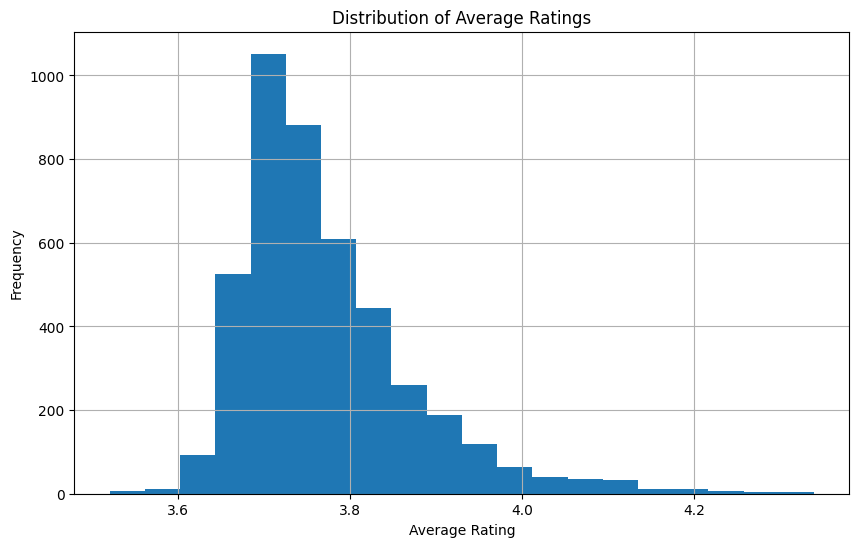

In [ ]:
# Convert all columns to numeric where possible
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Visualisation of the avg_rat column
plt.figure(figsize=(10, 6))
df['avg_rat'].hist(bins=20)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

Visualising the distribution of avg_rat is important, because it helps us understand the overall shape of that spesific data. By looking at the histogram, we can see if the data follows a common pattern, like a normal, skewed, or bimodal distribution. This can provide important characteristics of the data.

We used a histogram because it is an effective way to visualise the distribution of a single numerical variable. Histograms group data into “bins” or intervals, showing how frequently values fall within each range. This makes it easy to see patterns in the data, like common values, spread, and shape of the distribution, at a glance.

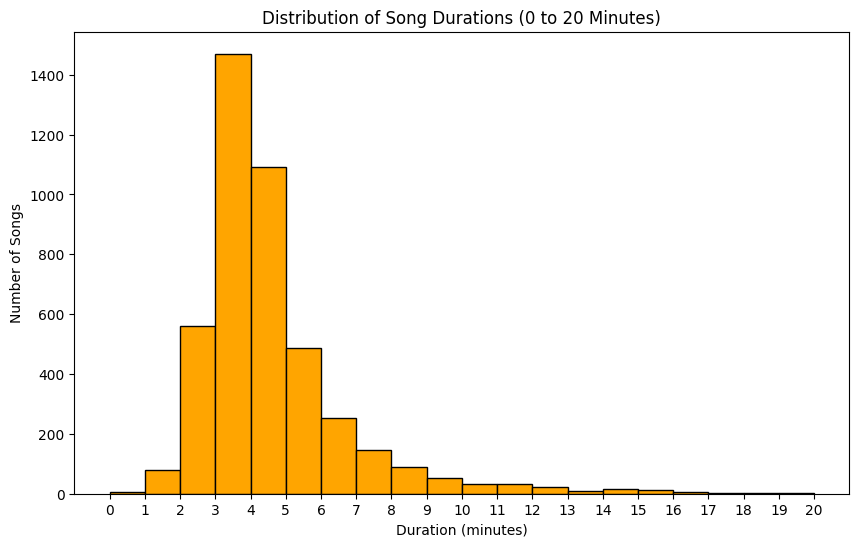

Number of Songs in Each Minute Range (0 to 20 Minutes):
Duration 0 - 1 minutes: 7
Duration 1 - 2 minutes: 78
Duration 2 - 3 minutes: 560
Duration 3 - 4 minutes: 1470
Duration 4 - 5 minutes: 1093
Duration 5 - 6 minutes: 488
Duration 6 - 7 minutes: 254
Duration 7 - 8 minutes: 147
Duration 8 - 9 minutes: 89
Duration 9 - 10 minutes: 54
Duration 10 - 11 minutes: 31
Duration 11 - 12 minutes: 32
Duration 12 - 13 minutes: 21
Duration 13 - 14 minutes: 8
Duration 14 - 15 minutes: 17
Duration 15 - 16 minutes: 11
Duration 16 - 17 minutes: 6
Duration 17 - 18 minutes: 4
Duration 18 - 19 minutes: 1
Duration 19 - 20 minutes: 4

Total Number of Songs: 4375

Number of Songs Longer than 20 Minutes: 27


In [ ]:
# Convert milliseconds to minutes
duration_in_minutes = df['duration_ms'] / 60000

# Get histogram data (frequency counts and bin edges) for 1-minute intervals within the 0-20 minute range
counts, bin_edges = np.histogram(duration_in_minutes, bins=range(0, 21))  # Adjusted to include 20 minutes

# Plot histogram for 0-20 minute range
plt.figure(figsize=(10, 6))
plt.hist(duration_in_minutes, bins=20, range=(0, 20), color='orange', edgecolor='black')
plt.title('Distribution of Song Durations (0 to 20 Minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Songs')
plt.xticks(range(0, 21))  # Set x-ticks from 0 to 20
plt.show()

# Output the count of songs for each 1-minute range
print("Number of Songs in Each Minute Range (0 to 20 Minutes):")
for i in range(len(counts)):
    print(f"Duration {i} - {i + 1} minutes: {counts[i]}")


# Calculate and print the total number of songs
total_songs = counts.sum()
print(f"\nTotal Number of Songs: {total_songs}")

# Count how many songs are longer than 20 minutes
songs_longer_than_20 = duration_in_minutes[duration_in_minutes > 20].count()
print(f"\nNumber of Songs Longer than 20 Minutes: {songs_longer_than_20}")

With this histogram, we analysed the song duration by converting the duration from miliseconds to minutes, making it easier to understand and read the data. Afterwards, we generated the actual histsogram that illustrates how many songs fall into each mintue interval.

The output reveals that the distribution of song durations within this dataset is majorly between 3-4 and 4-5 minutes. We can confidently say that this is, by lenght, the most common song type in our dataset. As the duration increases, the number of songs steadily decrease, with only 1 song in the 18-19 minute range and 4 songs in the 19-20 minute range.

Overall, only 27 exceed 20 minutes in duration, but for better readability of the histogram and output, I decided to just group any songs that exceed the 20 minute range.  

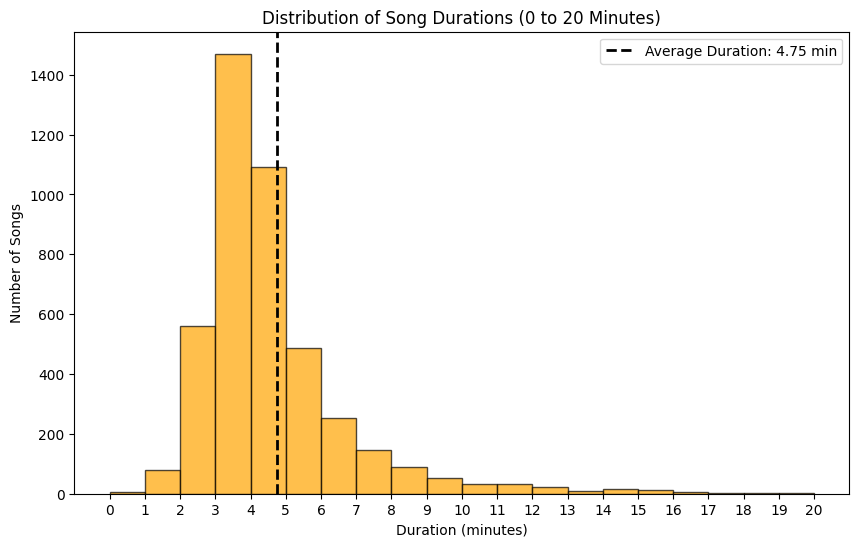

Average Duration of Songs: 4.75 minutes


In [ ]:
# Convert milliseconds to minutes
duration_in_minutes = df['duration_ms'] / 60000

# Calculate average duration
average_duration = duration_in_minutes.mean()

# Get histogram data (frequency counts and bin edges) for 1-minute intervals within the 0-20 minute range
counts, bin_edges = np.histogram(duration_in_minutes, bins=range(0, 21))  # Adjusted to include 20 minutes

# Plot histogram for 0-20 minute range
plt.figure(figsize=(10, 6))
plt.hist(duration_in_minutes, bins=20, range=(0, 20), color='orange', edgecolor='black', alpha=0.7)
plt.axvline(average_duration, color='black', linestyle='dashed', linewidth=2, label=f'Average Duration: {average_duration:.2f} min')
plt.title('Distribution of Song Durations (0 to 20 Minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Songs')
plt.xticks(range(0, 21))  # Set x-ticks from 0 to 20
plt.legend()  # Add a legend
plt.show()

# Output the average duration
print(f"Average Duration of Songs: {average_duration:.2f} minutes")

It is also worth mentioning that the average duration of the songs in this dataset is 4.75 minutes.

To determine the average duration of songs, I converted the song durations from ms to minutes by dividing the duration_ms column by 60,000. Then, I calculated the mean of these converted durations using the mean() function, which provided the average length of the songs. I also marked the histogram at the 4.75 point with a black dotted line to make it read easier.

In [ ]:
# Create a new categorical variable based on 'avg_rat'
bins = [0, 2, 4, 5]  # Define the bin edges
labels = ['Low', 'Med', 'High']  # Define the corresponding labels
df['rating_category'] = pd.cut(df['avg_rat'], bins=bins, labels=labels, right=False)

# Count the frequency of each category
category_counts = df['rating_category'].value_counts()
print(df['rating_category'].value_counts())


rating_category
Med     4230
High     172
Low        0
Name: count, dtype: int64


We took the avg_rat column and generated a categorical variable rating_category based on the defined bins. (Low, Medium, High) In this instance, Low means the lowest rating values (ie. 1/2), Medium means average rating values (ie. 3-4), and High means near perfect rating values (ie. 4-5).

We used the value_counts() on the rating_category() column to count how many antries fall into each category.

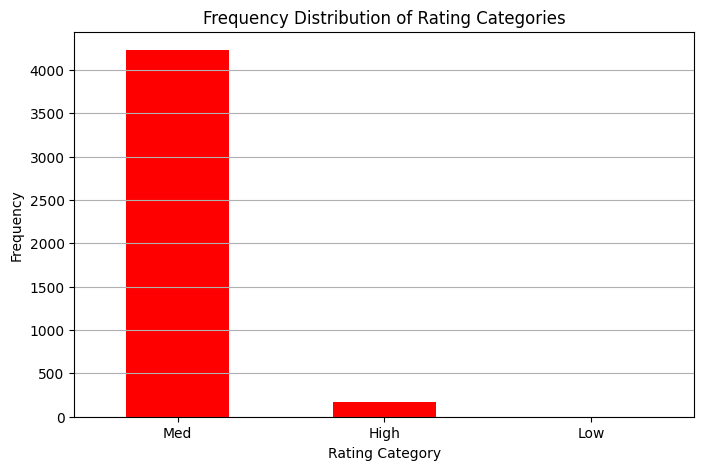

Numeric Summary of Rating Categories:
rating_category
Med     4230
High     172
Low        0
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar', color='red')
plt.title('Frequency Distribution of Rating Categories')
plt.xlabel('Rating Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.grid(axis='y')  # Add grid lines for better readability
plt.show()

# Print the numeric summary of the rating categories
print("Numeric Summary of Rating Categories:")
print(category_counts)

Then, we created a bar chart using matplotlib, where we plot the counts in a bar chart. We set the figure size for better visibility, we call the plot() method on category_counts, specifying kind='bar' to create a bar chart.

Adding plt.grid(axis='y') provides horizontal grid lines, helping with the readability of the values.



With the produced analysis, we can confidently say, based on the spotify_5000 dataset, that most avg_rat is in the "Medium" value, meaning listeners rated the songs/albums accordingly.

##Bivariate Analysis

In [ ]:
# Create a pivot table to summarize average ratings and average acousticness by genre
pivot_table = pd.pivot_table(
    df,
    values=['avg_rat', 'acousticness'],
    index=['gens'],  # Row: Genre
    aggfunc={'avg_rat': 'mean', 'acousticness': 'mean'},  # Mean of avg_rat and acousticness
    fill_value=0  # Fill NaN values with 0
)

# Sort the pivot table by average acousticness
sorted_pivot = pivot_table.sort_values(by='acousticness', ascending=False)

# Get top 5 genres by average acousticness
top_5_acoustic = sorted_pivot.head(5)

# Get bottom 5 genres by average acousticness
bottom_5_acoustic = sorted_pivot.tail(5)

# Display the full pivot table
print("Pivot Table of Average Ratings and Acousticness by Genre:")
print(pivot_table)

# Display top 5 genres by average acousticness
print("\nTop 5 Genres by Average Acousticness:")
print(top_5_acoustic)

# Display bottom 5 genres by average acousticness
print("\nBottom 5 Genres by Average Acousticness:")
print(bottom_5_acoustic)

Pivot Table of Average Ratings and Acousticness by Genre:
                    acousticness   avg_rat
gens                                      
2 Tone                  0.059814  3.700000
AOR                     0.359223  3.650000
Abstract Hip Hop        0.286279  3.809286
Acid Rock               0.962960  3.720000
Acoustic Blues          0.803750  3.770000
...                          ...       ...
Vocal Jazz              0.831083  3.785600
Warsaw City Folk        0.253676  3.760000
West Coast Hip Hop      0.172214  3.753333
Wolof Music             0.514778  3.700000
Zeuhl                   0.578066  3.762500

[428 rows x 2 columns]

Top 5 Genres by Average Acousticness:
                    acousticness   avg_rat
gens                                      
Gregorian Chant         0.990344  3.745000
Free Improvisation      0.985350  3.710000
Renaissance Music       0.979846  3.786667
Stride                  0.979000  3.730000
Impressionism           0.978704  3.856667

Bottom 5 Genres by

I created a pivot table to examine the relationship between music genres and their corresponding average ratings and acousticness. I used the pd.pivot.table() function to summarise the avg_rat and average accousticness for each genre. By specifying the genre as the index and calculating the mean for both metrics, we generated a clear and informative table that illustrates how different genres perform in term of listener ratings and acoustic characteristics.

Our analysis also reveals that genres with the top average accousticness are more 'niche' genres, whilst in the bottom 5 the genres are somewhat more popular, but still would be categorised as niche. This is an interesting parallel, because these findings suggests that the accousticness of songs/genres don't necessarily contribute to popularity in this case.

In [ ]:
# Create a pivot table to summarize average ratings and average acousticness by genre
pivot_table = pd.pivot_table(
    df,
    values=['avg_rat', 'acousticness'],
    index=['gens'],  # Row: Genre
    aggfunc={'avg_rat': 'mean', 'acousticness': 'mean'},  # Mean of avg_rat and acousticness
    fill_value=0  # Fill NaN values with 0
)

# Sort the pivot table by average rating
sorted_pivot = pivot_table.sort_values(by='avg_rat', ascending=False)

# Get top 5 genres
top_5 = sorted_pivot.head(5)

# Get bottom 5 genres
bottom_5 = sorted_pivot.tail(5)

# Display top 5 genres
print("Top 5 Genres by Average Rating:")
print(top_5)

# Display bottom 5 genres
print("\nBottom 5 Genres by Average Rating:")
print(bottom_5)

Top 5 Genres by Average Rating:
                    acousticness   avg_rat
gens                                      
Chipmunk Soul           0.360022  4.030000
Baggy / Madchester      0.090997  3.980000
Proto-Punk              0.164898  3.972500
Symphony                0.919734  3.962857
Future Garage           0.534408  3.940000

Bottom 5 Genres by Average Rating:
                  acousticness  avg_rat
gens                                   
Electropop            0.224301    3.642
Melodic Hardcore      0.162739    3.640
Radio Drama           0.019500    3.640
Groove Metal          0.014585    3.620
Emo-Pop               0.078702    3.590


In [ ]:
# Convert 'avg_rat' to numeric, forcing errors to NaN
df['avg_rat'] = pd.to_numeric(df['avg_rat'], errors='coerce')

# Check for NaN values in 'avg_rat' and handle them
print("NaN values in 'avg_rat':", df['avg_rat'].isnull().sum())

# Drop rows with NaN values in 'avg_rat' if necessary
df = df.dropna(subset=['avg_rat'])

# Calculate the average rating for each genre
average_ratings = df.groupby('gens')['avg_rat'].mean()

# Convert the average ratings to a DataFrame for better display
average_ratings_df = average_ratings.reset_index()

# Rename columns for clarity
average_ratings_df.columns = ['Genre', 'Average_Rating']

# Display the average ratings per genre
print("Average ratings received by each genre:")
print(average_ratings_df)

NaN values in 'avg_rat': 0
Average ratings received by each genre:
                  Genre  Average_Rating
0                2 Tone        3.700000
1                   AOR        3.650000
2      Abstract Hip Hop        3.809286
3             Acid Rock        3.720000
4        Acoustic Blues        3.770000
..                  ...             ...
423          Vocal Jazz        3.785600
424    Warsaw City Folk        3.760000
425  West Coast Hip Hop        3.753333
426         Wolof Music        3.700000
427               Zeuhl        3.762500

[428 rows x 2 columns]


With cross tabulation, I first ensured that the avg_rat column in the dataset is a numeric type by using pd.to_numeric(), which convers any non-numeric entries to NaN.

Then, I check for and handle any NaN values by counting them and dropping rows with missing avg_rat to maintain data integrity.

Nexy, I calculated the average rating for each genre by grouping the daat by the gens column and using the mean function. This gave me an idea on how each genre is rated in the dataset.

I converted the resulting averate ratings into a DataFrame for better readability and also renamed the columns to "Genre" and "Average Rating".

In [ ]:
# Sort the DataFrame by Average_Rating in descending order to find highest rated genres
highest_rated_genres = average_ratings_df.sort_values(by='Average_Rating', ascending=False)

# Sort the DataFrame by Average_Rating in ascending order to find lowest rated genres
lowest_rated_genres = average_ratings_df.sort_values(by='Average_Rating', ascending=True)

# Display the top 5 highest rated genres
print("Top 5 Highest Rated Genres:")
print(highest_rated_genres.head(5))

# Display the top 5 lowest rated genres
print("\nTop 5 Lowest Rated Genres:")
print(lowest_rated_genres.head(5))

Top 5 Highest Rated Genres:
                  Genre  Average_Rating
72        Chipmunk Soul        4.030000
34   Baggy / Madchester        3.980000
319          Proto-Punk        3.972500
395            Symphony        3.962857
171       Future Garage        3.940000

Top 5 Lowest Rated Genres:
                Genre  Average_Rating
137           Emo-Pop           3.590
186      Groove Metal           3.620
235  Melodic Hardcore           3.640
330       Radio Drama           3.640
135        Electropop           3.642


With the code above, I displayed the top and bototm 5 genres based by the average rating. This helps us visualise how each genre was rated, though it does not consider the number of ratings to calculate the average rating.

First, I sorted the average_ratings_df in descending order based on the Average_Rating column, which allowed me to extract the genres with the highest average ratings.

Similarly, I found the lowest average ratings by sorting in the lowest_rated_genres variable.

At last, I just displayed the top 5 and bottom 5 entries.

## Conclusion

My analysis of the Spotify5000.csv dataset revealed that there is a strong correlation between Genres and the Average Rating of songs - There are clear favourite genres which we can reveal by analysing the average rating and number of ratings side by side.

The cross tabulation also revealed that some genres might not be as popular as others (such as West Coast hip-hop, or Alternative Rock), but on average they received a higher average rating score than other genres. This phenomenon is caused because there are limited number of albums within those less prevalent genres, allowing for a higher average rating. This highlights the relationship between genre popularity and average rating, highlighting that less popular genres may receive less ratings, therefore maintaining a better average rate.

If we are looking at the bar chart from the 'Frequency Distribution of Rating Categories' chart, we can draw a conclusion that the majority of songs/albums fall within the "Med" rating category, with 4,230 entries. This can suggest to us that a large portion of the dataset is composed of songs/albums that received moderate average ratings, reflecting an average or "Medium" level of reception. On the other hand, the "High" rating category contains only 172 entries, revealing that while there are some standout songs/albums, they contribute a small fraction to the total.
Also, could be interesting to mention that the "Low" rating category has no entries, which implies that there are no songs/albums deemed poor in quality - which isn't surprising, hence we are looking at a Top 5000 Spotify hits dataset, therefore a song/album deemed as "Low" would be an anomaly and possibly be a faulty entry.

If we take a quick look at the pivot table, we can clearly determine that the accousticness doesn't necessarily contribute to higher average rating in genres, because our analysis revealed that the top 5 and bottom 5 of genres, sorted by average accousticness, share very similar average ratings. This leads me to believe that while accousticness is an important feature in music, it may not be the sole determinant of a genre's overall popularity or listener satisfaction.

<ipython-input-109-4acf2c3d35a8>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=combined, x='avg_rat', y='gens', palette='coolwarm')


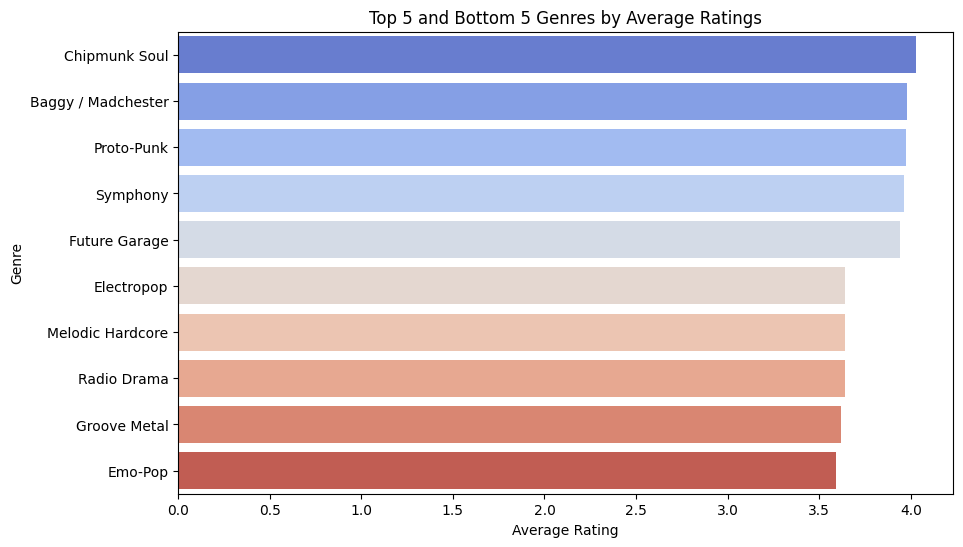

In [ ]:
# Sort pivot table by average ratings
sorted_pivot = pivot_table.sort_values(by='avg_rat', ascending=False)

# Get top 5 and bottom 5 genres
top_5 = sorted_pivot.head(5)
bottom_5 = sorted_pivot.tail(5)

# Combine top and bottom genres for plotting
combined = pd.concat([top_5, bottom_5])

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=combined, x='avg_rat', y='gens', palette='coolwarm')
plt.title('Top 5 and Bottom 5 Genres by Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

Lastly, the outliers across various columns in the dataset revealed that there is a significant variations in data quality. Specifically, the avg_rat column showed 40 outliers, indicating that the subset of ratings diverged consideravly from the norm, which can reflext extreme cases of satisfaction or dissatisfaction.

The num_revs column has 80 outliers, suggesting that a few items received either an unusually high or low number of reviews.

There are also 56 outliers in the duration_ms colum, which could suggest that some songs are longer or shorter than the rest. Finally, the time_signature column, with 45 outliers, could indicate irregular time sugnatures that are less common in mainstraim music but may appeal to nighe audiences.